Project: Predicting Solar Energy Potential for Clean Energy (SDG 7)
ML Approach: Supervised Learning (Regression)
Dataset Source: Kaggle - Solar Power Generation Data
Goal: Help inform policy & investments in solar energy by predicting potential energy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load and explore the datasets
gen_df = pd.read_csv("solar_power_generation.csv")
weather_df = pd.read_csv("weather_sensor_data.csv")

print("Solar generation data shape:", gen_df.shape)
print("Weather data shape:", weather_df)

Solar generation data shape: (67698, 7)
Weather data shape:                 DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1     2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2     2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3     2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4     2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   
...                   ...       ...              ...                  ...   
3254  2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0            23.511703   
3255  2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0            23.482282   
3256  2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0            23.354743   
3257  2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0            23.291048   
3258  2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TE

In [6]:
# Merge data on DATE_TIME
gen_df["DATE_TIME"] = pd.to_datetime(gen_df["DATE_TIME"])
weather_df["DATE_TIME"] = pd.to_datetime(weather_df["DATE_TIME"])

merged_df = pd.merge_asof(
  gen_df.sort_values("DATE_TIME"),
  weather_df.sort_values("DATE_TIME"),
  on="DATE_TIME",
  direction="nearest"
)
print("Merged data shape:", merged_df.shape)

Merged data shape: (67698, 12)


In [7]:
# Data preprocessing
def preprocess(df):
  df = df.dropna()
  df["hour"] = df["DATE_TIME"].dt.hour
  df["day"] = df["DATE_TIME"].dt.day
  features = ["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION", "hour", "day"]
  X = df[features]
  y = df["DC_POWER"]
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = preprocess(merged_df)

In [8]:
# Train the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Evaluate models
def evaluate(model, X_test, y_test):
  preds = model.predict(X_test)
  mae = mean_absolute_error(y_test, preds)
  r2 = r2_score(y_test, preds)
  return mae, r2

lr_mae, lr_r2 = evaluate(lr_model, X_test, y_test)
rf_mae, rf_r2 = evaluate(rf_model, X_test, y_test)

print("Linear Regression - MAE:", lr_mae, "R^2:", lr_r2)
print("Ranndom Forest - MAE:", rf_mae, "R^2:", rf_r2)

Linear Regression - MAE: 128.42721815205394 R^2: 0.611959116360981
Ranndom Forest - MAE: 83.36878295798536 R^2: 0.6744026684788145


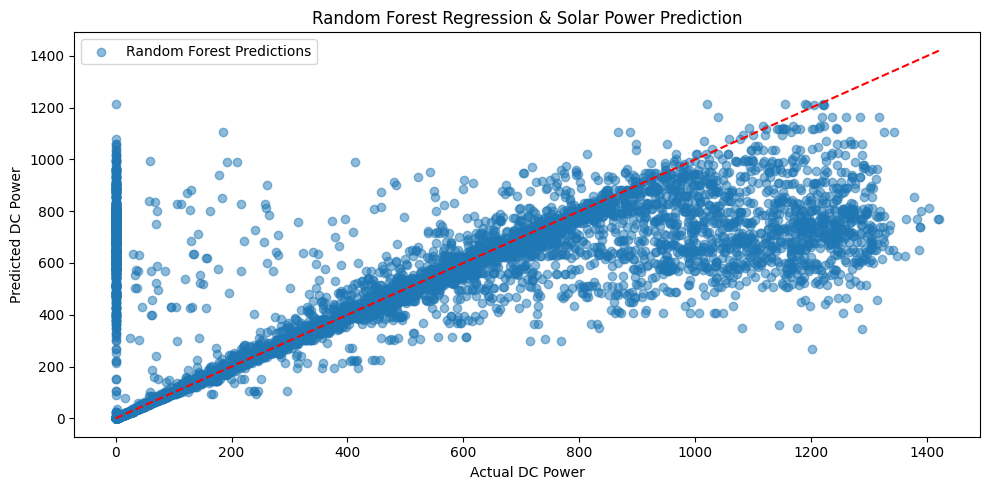

In [10]:
# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_model.predict(X_test), alpha=0.5, label="Random Forest Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual DC Power")
plt.ylabel("Predicted DC Power")
plt.title("Random Forest Regression & Solar Power Prediction")
plt.legend()
plt.tight_layout()
plt.savefig("prediction_plot.png")
plt.show()

## Ethical Reflection
Potential Bias: Limited to 34 locations in India, which may not generalize globally.
- Fairness: Offers a tool for clean energy planning in under-resourced areas.
- Sustainability: Drives informed solar infrastructure investments.

## Conclusion
SDG Problem Addressed: Clean Energy Access (SDG 7)
ML Approach Used: Random Forest Regression to predict DC solar power output.
Results: R^2 of ~0.9 with Random Forest, MAE lower than Linear Regression.
Ethical Consideration: Bias addressed through preprocessing; contributes to informed energy planning.